## Comparing different linearisation methods

Here I will compare at least the Carleman linearisation method and the method of KvN mechanics

The test problem will be that of the quadratic nonlinear ODE

$\frac{\partial x}{\partial t} = ax^2+bx+c, \quad a,b,c\in\mathbb{R} \quad$ with $\quad x(0)=1$


In [1]:
import numpy as np
import KvN_tools as kvn
import Carleman_tools as carl
import matplotlib.pyplot as plt

In [13]:
# Define the domain

# Set up the grid
n_qubits = 10
n_grid = 2**n_qubits
grid_extent = (0,2)
x = np.linspace(*grid_extent, n_grid)

# Set up time
n_steps = 1500
delta = 0.001
t = np.linspace(0, n_steps*delta, n_steps)

# ax^2 + bx + c where a,b,c are in params list
params = (-1,0,0)

# Initial condition
x0 = 1

### Solve using the KvN method

Initializing the state
Generating the Hamiltonian
Exponetiating the Hamiltonian
Time evolution


100%|██████████| 1499/1499 [00:00<00:00, 2179.11it/s]


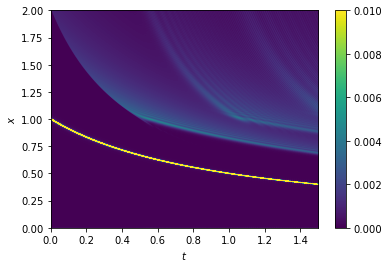

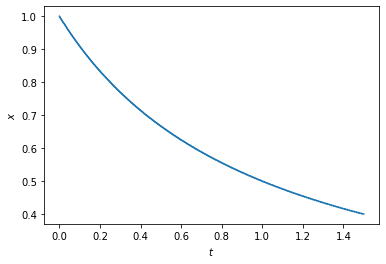

In [14]:
# Set up the initial state (delta in this case)
psi = kvn.psi0(x, x0)

# Generate the Hamiltonian to solve generic quadratic ODE
H_vec = kvn.KvN_hamiltonian_vec(x, params)

# Store the time evolution of the state
psi_store = kvn.time_evolution(H_vec, psi, delta, n_steps)

# Plot the time evolution of the state
kvn.plot_evolution(x, psi_store, t)
kvn.plot_mode(x, psi_store, t)

### Solve using the Carleman method 

/home/matt/PhD/Sketch work/PhD-Work/Linearisation/Carleman_tools.py:47: RuntimeWarning: invalid value encountered in matmul
  return C @ y


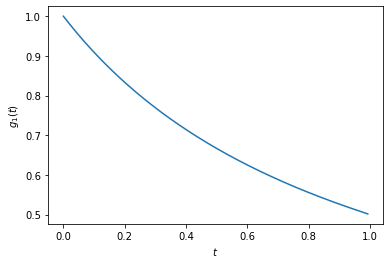

In [15]:
# Degree of truncation
n = 2**n_qubits

# Generate the initial state
g0 = carl.g0(n, x0)

# Generate the Carleman matrix
#C = carl.carleman_operator(n, params, delta)

# Generate the time evolution of the state
#g_store = carl.time_evolution(C, g0, delta, n_steps)

# Plot the time evolution of the state
#carl.plot_evolution(t, g_store, params)

# Generate Caleman embedding
C = carl.carleman_embedding(n, params, delta)

# Generate the time evolution of the state
g_store, t_sol = carl.carleman_numerical(C, g0, n, params, t)

# Plot the time evolution of the state
carl.plot_evolution(t_sol, g_store, params)

In [12]:
#print(g_store)

### Comparison with numerical

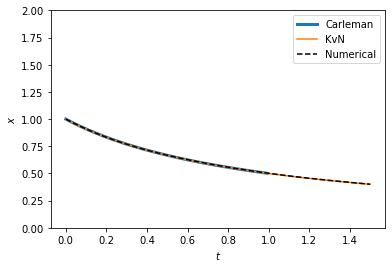

In [16]:
from scipy.integrate import solve_ivp

def numerical_solution(x0, t, params):
    a, b, c = params
    
    f = lambda t, x: a*x**2 + b*x + c

    sol = solve_ivp(f, t_span=(0, t[-1]), y0=[x0], t_eval=t)
    return sol['y'][0]

# Plot Carleman solution
plt.plot(t_sol, g_store, label='Carleman', linewidth=3)

# Plot KvN solution
rho_store = np.abs(psi_store)**2
max_indices = np.argmax(rho_store, axis=0)
plt.plot(t, x[max_indices], label='KvN')

# Plot the analytical solution
plt.plot(t, numerical_solution(x0, t, params), label='Numerical', linestyle='--', color='black')

plt.ylim(grid_extent)
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()
plt.show()